## Quantum teleportation

### Quantum circuit

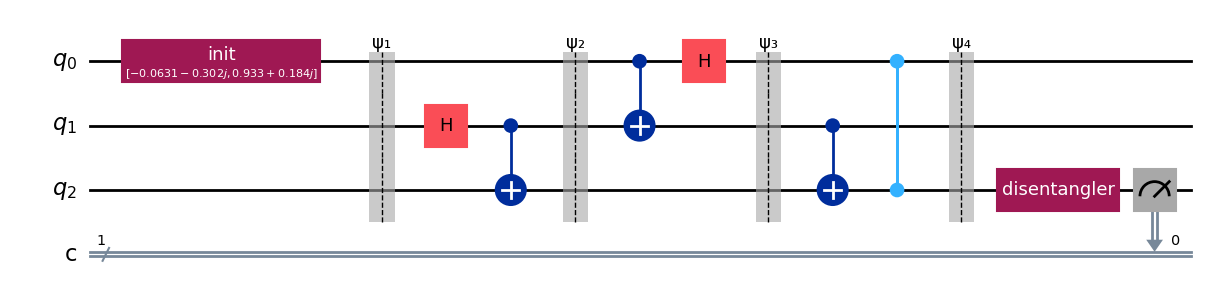

In [165]:
from qiskit import QuantumCircuit
from qiskit.extensions import Initialize

init_gate = Initialize(random_statevector(2))
init_gate.label = "init"
inverse_init_gate = init_gate.gates_to_uncompute()

circuit = QuantumCircuit(3, 1)

circuit.append(init_gate, [0])
circuit.barrier(label="ψ₁")

circuit.h(1)
circuit.cx(1,2)
circuit.barrier(label="ψ₂")

circuit.cx(0, 1)
circuit.h(0)
circuit.barrier(label="ψ₃")

circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier(label="ψ₄")

circuit.append(inverse_init_gate, [2])
circuit.measure(2,0)

circuit.draw("mpl", style="iqp")

$ 
\begin{align}
\ket{\psi_1} &= \biggl[ \psi \otimes \ket{0} \otimes \ket{0} \biggr] \\
&= \biggl[ \biggr( \alpha \ket{0} + \beta \ket{1} \biggr) \otimes \ket{0} \otimes \ket{0} \biggr] \\ \\
\ket{\psi_2} &= C_1X_2H_1 \psi_1 \\
&= C_1X_2 \biggl[ \biggr( \alpha \ket{0} + \beta \ket{1} \biggr) \otimes \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} + \ket{1} \biggr) \otimes \ket{0} \biggr] \\
&= C_1X_2 \biggl[ \biggr( \alpha \ket{0} + \beta \ket{1} \biggr) \otimes \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{00} + \ket{10} \biggr) \biggr] \\
&= \biggr( \alpha \ket{0} + \beta \ket{1} \biggr) \otimes \frac{1}{\sqrt{2}} \biggl( \ket{00} + \ket{11} \biggr) \\
&= \frac{1}{\sqrt{2}} \biggl( \alpha \ket{000} + \alpha \ket{011} + \beta \ket{100} + \beta \ket{111} \biggr) \\ \\
\ket{\psi_3} &= H_0C_0X_1 \psi_2 \\
\ket{\psi_3} &= H_0C_0X_1 \biggl[ \frac{1}{\sqrt{2}} \biggl( \alpha \ket{000} + \alpha \ket{011} + \beta \ket{100} + \beta \ket{111} \biggr) \biggr] \\
&= H_0 \biggl[ \frac{1}{\sqrt{2}} \biggl( \alpha \ket{000} + \alpha \ket{011} + \beta \ket{110} + \beta \ket{101} \biggr) \biggr] \\
&= H_0 \biggl[
    \frac{1}{\sqrt{2}} \biggl( 
        \alpha \biggl( \ket{0} \otimes  \ket{00} \biggr) + 
        \alpha \biggl( \ket{0} \otimes  \ket{11} \biggr) + 
        \beta \biggl( \ket{1} \otimes  \ket{10} \biggr) + 
        \beta \biggl( \ket{1} \otimes  \ket{01} \biggr)
    \biggr)
\biggr] \\
&= \frac{1}{\sqrt{2}} \biggl( 
        \alpha \biggl( \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} + \ket{1} \biggr) \otimes  \ket{00} \biggr) + 
        \alpha \biggl( \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} + \ket{1} \biggr) \otimes  \ket{11} \biggr) + 
        \beta \biggl( \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} - \ket{1} \biggr) \otimes  \ket{10} \biggr) + 
        \beta \biggl( \biggl( \frac{1}{\sqrt{2}} \biggl( \ket{0} - \ket{1} \biggr) \otimes  \ket{01} \biggr)
\biggr) \\
&= \frac{1}{\sqrt{2}} \biggl(
      \frac{\alpha\ket{000} + \alpha\ket{100}}{\sqrt{2}} +
      \frac{\alpha\ket{011} + \alpha\ket{111}}{\sqrt{2}} +
      \frac{\beta\ket{010} - \beta\ket{110}}{\sqrt{2}} +
      \frac{\beta\ket{000} - \beta\ket{101}}{\sqrt{2}}
\biggr) \\
&= \frac{1}{2} \biggl(
    \ket{00}\alpha\ket{0} +
    \ket{10}\alpha\ket{0} +
    \ket{01}\alpha\ket{1} +
    \ket{11}\alpha\ket{1} +
    \ket{01}\beta\ket{0} -
    \ket{11}\beta\ket{0} +
    \ket{00}\beta\ket{0} -
    \ket{10}\beta\ket{1}
\biggr) \\
&= \frac{1}{2} \biggl(
     \ket{00} \biggl( \alpha\ket{0} + \beta\ket{0} \biggr) + 
     \ket{01} \biggl( \alpha\ket{1} + \beta\ket{0} \biggr) +
     \ket{10} \biggl( \alpha\ket{0} - \beta\ket{1} \biggr) +
     \ket{11} \biggl( \alpha\ket{1} - \beta\ket{0} \biggr)
\biggr) \\ \\
\ket{\psi_4} &= C_0Z_2C_1X_2 \psi_3 \\
&= C_0Z_2C_1X_2 \biggl[ \frac{1}{2} 
    \biggl(
        \ket{00} \biggl( \alpha\ket{0} + \beta\ket{0} \biggr) + 
        \ket{01} \biggl( \alpha\ket{1} + \beta\ket{0} \biggr) +
        \ket{10} \biggl( \alpha\ket{0} - \beta\ket{1} \biggr) +
        \ket{11} \biggl( \alpha\ket{1} - \beta\ket{0} \biggr)
    \biggr)
\biggr] \\
&= C_0Z_2 \biggl[ \frac{1}{2} 
    \biggl(
        \ket{00} \biggl( \alpha\ket{0} + \beta\ket{0} \biggr) + 
        \ket{01} \biggl( \alpha\ket{0} + \beta\ket{1} \biggr) +
        \ket{10} \biggl( \alpha\ket{0} - \beta\ket{1} \biggr) +
        \ket{11} \biggl( \alpha\ket{0} - \beta\ket{1} \biggr)
    \biggr)
\biggr] \\
&= \frac{1}{2} \biggl(
    \ket{00} \biggl( \alpha\ket{0} + \beta\ket{0} \biggr) + 
    \ket{01} \biggl( \alpha\ket{0} + \beta\ket{1} \biggr) +
    \ket{10} \biggl( \alpha\ket{0} + \beta\ket{1} \biggr) +
    \ket{11} \biggl( \alpha\ket{0} + \beta\ket{1} \biggr)
\biggr) \\
&= \frac{1}{2} \biggl(
    \ket{00} \otimes \psi + 
    \ket{01} \otimes \psi +
    \ket{10} \otimes \psi +
    \ket{11} \otimes \psi
\biggr)
\end{align}
$

### Execution on a quantum simulator

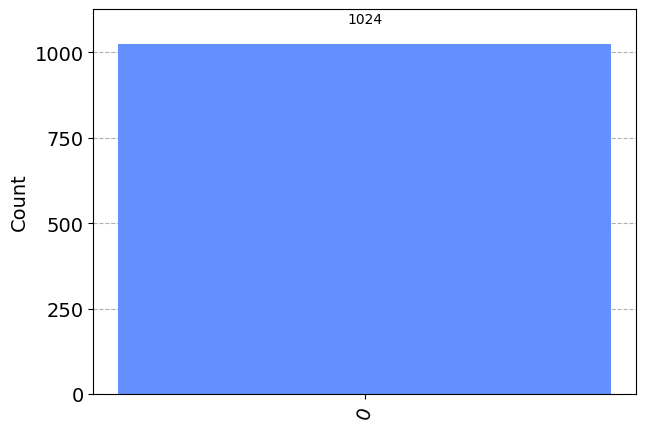

In [167]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend("aer_simulator")
transpiled_circuit = transpile(circuit, simulator)
counts = simulator.run(transpiled_circuit).result().get_counts()
plot_histogram(counts)

### Execution on a quantum computer

Job Status: job has successfully run


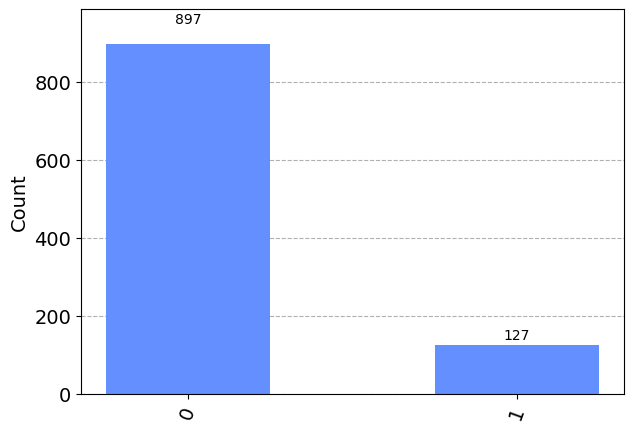

In [170]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
import os

service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ["IBM_QUANTUM_TOKEN"])
backend = service.least_busy(operational=True, min_num_qubits=3, simulator=False)
transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit, shots=1024)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

In [151]:
import qiskit.tools.jupyter
%qiskit_version_table